### The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

### EDA
Load the data.
Look at the median_house_value variable. Does it have a long tail?

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
data_df=pd.read_csv("housing.csv")

/home/isabella/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


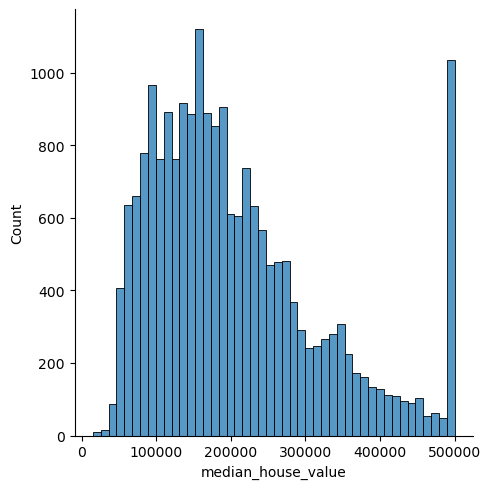

In [3]:
sns.displot(data_df, x="median_house_value")


### Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'


In [4]:
mask=(data_df["ocean_proximity"]=='<1H OCEAN') | (data_df["ocean_proximity"]=='INLAND')
mask_data_df=data_df[mask][['latitude',
                            'longitude',
                            'housing_median_age',
                            'total_rooms',
                            'total_bedrooms',
                            'population',
                            'households',
                            'median_income',
                            'median_house_value'
                            ]]

In [5]:
mask_data_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [6]:
mask_data_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1
There's one feature with missing values. What is it?

total_bedrooms


In [7]:
mask_data_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'population'?

1195

In [8]:
mask_data_df["population"].quantile(q=0.5)

1195.0

In [9]:
mask_data_df["population"].median()

1195.0

### Prepare and split the dataset
Shuffle the initial dataset, use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [10]:
prep_data_set=shuffle(mask_data_df, random_state=42)
X_train, X_test = train_test_split(mask_data_df, test_size=0.2, train_size=.8, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.25, train_size=.75, random_state=42)


Double checking we are close to the expected values:

In [11]:
(len(prep_data_set)*.6)-len(X_train)

1.1999999999989086

In [12]:
(len(prep_data_set)*.2)-len(X_val) 

-0.599999999999909

In [13]:
(len(prep_data_set)*.2)-len(X_test) 

-0.599999999999909

Applying the transform

In [14]:
for df in [X_test, X_train, X_val]:
    df["median_house_value"]=np.log1p(df["median_house_value"])


### Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

Options:

With 0
With mean
Both are equally good

In [106]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Prep

In [16]:
y_train= X_train["median_house_value"]
X_train.drop("median_house_value", inplace=True, axis=1)

In [17]:
y_val= X_val["median_house_value"]
X_val.drop("median_house_value", inplace=True, axis=1)

In [18]:
y_test=X_test["median_house_value"]
X_test.drop("median_house_value", inplace=True, axis=1)

### With Zero

In [19]:
X_train_zero = X_train.copy()
X_train_zero["total_bedrooms"]=X_train_zero["total_bedrooms"].fillna(0)

X_val_zero = X_val.copy()
X_val_zero["total_bedrooms"]=X_val_zero["total_bedrooms"].fillna(0)

In [20]:
w0_zero, w1_zero= train_linear_regression(X_train_zero, y_train)
y_pred_zero = w0_zero + X_train_zero.dot(w1_zero)
rmse_zero=rmse(y_train, y_pred_zero)

In [30]:
y_pred_zero_val = w0_zero + X_val.dot(w1_zero)
rmse_zero_val=rmse(y_val, y_pred_zero_val)

In [22]:
y_pred_zero_test = w0_zero + X_test.dot(w1_zero)
rmse_zero_test=rmse(y_test, y_pred_zero_test)

In [24]:
rmse_zero_test

0.3369415991539877

### With Mean

In [25]:
X_train_mean = X_train.copy()
mean_total_bedrooms=X_train_mean["total_bedrooms"].mean()
X_train_mean["total_bedrooms"]=X_train_mean["total_bedrooms"].fillna(mean_total_bedrooms)


X_val_mean = X_val.copy()
mean_total_bedrooms_val=X_val_mean["total_bedrooms"].mean()
X_val_mean["total_bedrooms"]=X_val_mean["total_bedrooms"].fillna(mean_total_bedrooms_val)

In [26]:
w0_mean, w1_mean= train_linear_regression(X_train_mean, y_train)
y_pred_mean= w0_mean + X_train_mean.dot(w1_mean)
rmse_mean=rmse(y_train, y_pred_mean)

In [27]:
y_pred_mean_val = w0_mean + X_val.dot(w1_mean)
rmse_mean_val=rmse(y_val, y_pred_mean_val)

In [28]:
y_pred_mean_test = w0_mean + X_test.dot(w1_mean)
rmse_mean_test=rmse(y_test, y_pred_mean_test)

#### Evaluation

In [31]:
format_info=("Filling missing columns with {}: rmse training {}, rmse validation {}, rmse test {}")
print(format_info.format("Zero", np.around(rmse_zero, 5), np.around(rmse_zero_val, 5), np.around(rmse_zero_test, 5)))
print(format_info.format("Mean",  np.around(rmse_mean, 5), np.around(rmse_mean_val, 5), np.around(rmse_zero_test, 5)))

Filling missing columns with Zero: rmse training 0.34057, rmse validation 0.33556, rmse test 0.33694
Filling missing columns with Mean: rmse training 0.34036, rmse validation 0.33511, rmse test 0.33694


### Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

In [32]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [67]:
X_train_zero = X_train.copy()
X_train_zero["total_bedrooms"]=X_train_zero["total_bedrooms"].fillna(0)

X_val_zero = X_val.copy()
X_val_zero["total_bedrooms"]=X_val_zero["total_bedrooms"].fillna(0)

r_values=[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
dict_combination={}
for r in r_values:

    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    y_pred = w_0 + X_val_zero.dot(w)
    rmse_r=rmse(y_val, y_pred)
    print("r {} = {}".format(r, rmse_r))
    dict_combination[r]= np.round(rmse_r, 2)   


r 0 = 0.33537270160983346
r 1e-06 = 0.3353726989887984
r 0.0001 = 0.33537243978568365
r 0.001 = 0.33537011835146524
r 0.01 = 0.3353502382174601
r 0.1 = 0.335386361649615
r 1 = 0.3380836493421056
r 5 = 0.3407219246388807
r 10 = 0.34127841795239466


In [85]:
w

array([-1.91969300e-01, -1.55053916e-01,  2.21583827e-03, -3.54318109e-05,
        1.93252057e-04, -1.85875595e-04,  5.87316211e-04,  1.86907845e-01])

In [62]:
data_reg=pd.DataFrame.from_dict(dict_combination, orient='index').reset_index()
data_reg=data_reg.rename({'index': 'r', 0:'rmse'}, axis=1)

In [66]:
data_reg

,r,rmse
0,0.000000,0.34
1,0.000001,0.34
2,0.000100,0.34
3,0.001000,0.34
4,0.010000,0.34
5,0.100000,0.34
6,1.000000,0.34
7,5.000000,0.34
8,10.000000,0.34


### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]. [x]
For each seed, do the train/validation/test split with 60%/20%/20% distribution. [x]
Fill the missing values with 0 and train a model without regularization. [x]
For each seed, evaluate the model on the validation dataset and collect the RMSE scores. [x]
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

In [140]:
n = len(mask_data_df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
dict_seed={}
seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed_i in seeds:
    np.random.seed(seed_i)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = mask_data_df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()


    y_train = np.log1p(df_train["median_house_value"])
    y_val= np.log1p(df_val["median_house_value"])
    y_test = np.log1p(df_test["median_house_value"])


    df_train.drop("median_house_value", inplace=True, axis=1)
    df_val.drop("median_house_value", inplace=True, axis=1)
    df_test.drop("median_house_value", inplace=True, axis=1)

    df_train["total_bedrooms"].fillna(0)
    df_val["total_bedrooms"].fillna(0)


    w0, w1= train_linear_regression(df_train, y_train)
    y_pred_val = w0 + df_val.dot(w1)
    rmse_zero=rmse(y_val, y_pred_val)
    dict_seed[seed_i]=rmse_zero

In [113]:
X=df_train.to_numpy()
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])

XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w = XTX_inv.dot(X.T).dot(y_train)
    

In [138]:
np.any(np.isnan(X.T))

True

In [120]:
np.linalg.inv(XTX)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan]])

### Question 6
Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:
